## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  99.292578  1324.870837  0.262887   6.519446  1.173695
1  72.168065   522.639399  0.038227  10.821318  0.286467
2  65.979962  1548.567410  0.747437   2.230239  1.421784
3  39.394800   146.612624  0.863397   5.012217  1.076727
4  55.323086   147.350513  0.032818   4.862143  0.092189


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.29173 | train_mse: 5.38433 | train_mae: 1.55578 |  0:00:00s
epoch 1  | loss: 1.25334 | train_mse: 4.51112 | train_mae: 1.50705 |  0:00:00s


epoch 2  | loss: 1.02562 | train_mse: 3.78349 | train_mae: 1.44299 |  0:00:00s
epoch 3  | loss: 0.81802 | train_mse: 2.9524  | train_mae: 1.31416 |  0:00:00s
epoch 4  | loss: 0.86304 | train_mse: 2.41226 | train_mae: 1.20203 |  0:00:00s


epoch 5  | loss: 0.90008 | train_mse: 1.94299 | train_mae: 1.07377 |  0:00:00s
epoch 6  | loss: 0.6512  | train_mse: 1.6459  | train_mae: 1.00275 |  0:00:00s
epoch 7  | loss: 0.79013 | train_mse: 1.44426 | train_mae: 0.93623 |  0:00:01s


epoch 8  | loss: 0.6518  | train_mse: 1.27271 | train_mae: 0.87837 |  0:00:01s
epoch 9  | loss: 0.60709 | train_mse: 1.13466 | train_mae: 0.83449 |  0:00:01s
epoch 10 | loss: 0.57328 | train_mse: 1.04231 | train_mae: 0.7998  |  0:00:01s


epoch 11 | loss: 0.64382 | train_mse: 0.9722  | train_mae: 0.7701  |  0:00:01s
epoch 12 | loss: 0.72565 | train_mse: 0.90823 | train_mae: 0.73805 |  0:00:01s


epoch 13 | loss: 0.66681 | train_mse: 0.83854 | train_mae: 0.70635 |  0:00:01s
epoch 14 | loss: 0.44955 | train_mse: 0.75195 | train_mae: 0.66199 |  0:00:01s
epoch 15 | loss: 0.72066 | train_mse: 0.70075 | train_mae: 0.63205 |  0:00:01s


epoch 16 | loss: 0.39255 | train_mse: 0.68353 | train_mae: 0.62239 |  0:00:01s
epoch 17 | loss: 0.51528 | train_mse: 0.64877 | train_mae: 0.60901 |  0:00:01s
epoch 18 | loss: 0.43405 | train_mse: 0.61218 | train_mae: 0.58673 |  0:00:02s


epoch 19 | loss: 0.57033 | train_mse: 0.56892 | train_mae: 0.56885 |  0:00:02s
epoch 20 | loss: 0.42891 | train_mse: 0.51922 | train_mae: 0.54389 |  0:00:02s
epoch 21 | loss: 0.32646 | train_mse: 0.49672 | train_mae: 0.53569 |  0:00:02s


epoch 22 | loss: 0.60772 | train_mse: 0.47901 | train_mae: 0.52623 |  0:00:02s
epoch 23 | loss: 0.38108 | train_mse: 0.4637  | train_mae: 0.5117  |  0:00:02s


epoch 24 | loss: 0.43407 | train_mse: 0.45271 | train_mae: 0.50367 |  0:00:02s
epoch 25 | loss: 0.42108 | train_mse: 0.44678 | train_mae: 0.495   |  0:00:02s
epoch 26 | loss: 0.47805 | train_mse: 0.43759 | train_mae: 0.48999 |  0:00:02s


epoch 27 | loss: 0.5238  | train_mse: 0.42833 | train_mae: 0.48821 |  0:00:02s
epoch 28 | loss: 0.3031  | train_mse: 0.42421 | train_mae: 0.4812  |  0:00:02s
epoch 29 | loss: 0.49885 | train_mse: 0.38862 | train_mae: 0.4535  |  0:00:03s


epoch 30 | loss: 0.60323 | train_mse: 0.35411 | train_mae: 0.43718 |  0:00:03s
epoch 31 | loss: 0.37463 | train_mse: 0.33799 | train_mae: 0.42204 |  0:00:03s
epoch 32 | loss: 0.38474 | train_mse: 0.32543 | train_mae: 0.41044 |  0:00:03s


epoch 33 | loss: 0.4692  | train_mse: 0.33143 | train_mae: 0.40124 |  0:00:03s
epoch 34 | loss: 0.4117  | train_mse: 0.35959 | train_mae: 0.40736 |  0:00:03s


epoch 35 | loss: 0.48147 | train_mse: 0.4106  | train_mae: 0.42127 |  0:00:03s
epoch 36 | loss: 0.49587 | train_mse: 0.41745 | train_mae: 0.41845 |  0:00:03s
epoch 37 | loss: 0.49285 | train_mse: 0.42388 | train_mae: 0.42157 |  0:00:03s


epoch 38 | loss: 0.43706 | train_mse: 0.42957 | train_mae: 0.42403 |  0:00:03s
epoch 39 | loss: 0.43656 | train_mse: 0.41218 | train_mae: 0.41952 |  0:00:04s
epoch 40 | loss: 0.4181  | train_mse: 0.40235 | train_mae: 0.41687 |  0:00:04s


epoch 41 | loss: 0.23836 | train_mse: 0.37015 | train_mae: 0.40878 |  0:00:04s
epoch 42 | loss: 0.25318 | train_mse: 0.31708 | train_mae: 0.39334 |  0:00:04s


epoch 43 | loss: 0.46098 | train_mse: 0.26663 | train_mae: 0.37775 |  0:00:04s


epoch 44 | loss: 0.58883 | train_mse: 0.30148 | train_mae: 0.38566 |  0:00:04s


epoch 45 | loss: 0.44665 | train_mse: 0.30629 | train_mae: 0.38817 |  0:00:04s
epoch 46 | loss: 0.25239 | train_mse: 0.30101 | train_mae: 0.38536 |  0:00:05s


epoch 47 | loss: 0.34697 | train_mse: 0.29256 | train_mae: 0.38241 |  0:00:05s
epoch 48 | loss: 0.44635 | train_mse: 0.29925 | train_mae: 0.37954 |  0:00:05s


epoch 49 | loss: 0.27506 | train_mse: 0.30169 | train_mae: 0.37955 |  0:00:05s
epoch 50 | loss: 0.27963 | train_mse: 0.29715 | train_mae: 0.37516 |  0:00:05s


epoch 51 | loss: 0.47946 | train_mse: 0.30843 | train_mae: 0.37354 |  0:00:05s
epoch 52 | loss: 0.4946  | train_mse: 0.27942 | train_mae: 0.37007 |  0:00:05s


epoch 53 | loss: 0.31506 | train_mse: 0.25853 | train_mae: 0.36598 |  0:00:05s
epoch 54 | loss: 0.28907 | train_mse: 0.23512 | train_mae: 0.35896 |  0:00:06s


epoch 55 | loss: 0.6272  | train_mse: 0.22753 | train_mae: 0.35735 |  0:00:06s
epoch 56 | loss: 0.19479 | train_mse: 0.24756 | train_mae: 0.36646 |  0:00:06s


epoch 57 | loss: 0.4856  | train_mse: 0.26435 | train_mae: 0.36358 |  0:00:06s
epoch 58 | loss: 0.37375 | train_mse: 0.28439 | train_mae: 0.36416 |  0:00:06s


epoch 59 | loss: 0.48685 | train_mse: 0.29596 | train_mae: 0.36492 |  0:00:06s
epoch 60 | loss: 0.40698 | train_mse: 0.29574 | train_mae: 0.36573 |  0:00:06s


epoch 61 | loss: 0.47802 | train_mse: 0.28844 | train_mae: 0.3628  |  0:00:06s
epoch 62 | loss: 0.49602 | train_mse: 0.27777 | train_mae: 0.35896 |  0:00:07s


epoch 63 | loss: 0.35953 | train_mse: 0.27345 | train_mae: 0.35826 |  0:00:07s
epoch 64 | loss: 0.38734 | train_mse: 0.26331 | train_mae: 0.35728 |  0:00:07s


epoch 65 | loss: 0.31929 | train_mse: 0.22936 | train_mae: 0.35487 |  0:00:07s
epoch 66 | loss: 0.29527 | train_mse: 0.22161 | train_mae: 0.35055 |  0:00:07s


epoch 67 | loss: 0.28407 | train_mse: 0.25031 | train_mae: 0.35537 |  0:00:07s
epoch 68 | loss: 0.38996 | train_mse: 0.32757 | train_mae: 0.37495 |  0:00:07s
epoch 69 | loss: 0.32425 | train_mse: 0.34308 | train_mae: 0.37534 |  0:00:07s


epoch 70 | loss: 0.41019 | train_mse: 0.33565 | train_mae: 0.37408 |  0:00:08s
epoch 71 | loss: 0.37858 | train_mse: 0.23035 | train_mae: 0.34372 |  0:00:08s


epoch 72 | loss: 0.38826 | train_mse: 0.23516 | train_mae: 0.34568 |  0:00:08s
epoch 73 | loss: 0.32914 | train_mse: 0.27874 | train_mae: 0.35805 |  0:00:08s


epoch 74 | loss: 0.29836 | train_mse: 0.31039 | train_mae: 0.36245 |  0:00:08s
epoch 75 | loss: 0.35377 | train_mse: 0.31979 | train_mae: 0.36089 |  0:00:08s


epoch 76 | loss: 0.29155 | train_mse: 0.32004 | train_mae: 0.36336 |  0:00:08s
epoch 77 | loss: 0.24414 | train_mse: 0.31568 | train_mae: 0.36149 |  0:00:08s
epoch 78 | loss: 0.31481 | train_mse: 0.30442 | train_mae: 0.35881 |  0:00:08s


epoch 79 | loss: 0.34656 | train_mse: 0.26734 | train_mae: 0.35016 |  0:00:08s
epoch 80 | loss: 0.30127 | train_mse: 0.21246 | train_mae: 0.33701 |  0:00:09s
epoch 81 | loss: 0.29084 | train_mse: 0.18821 | train_mae: 0.32897 |  0:00:09s


epoch 82 | loss: 0.4088  | train_mse: 0.19561 | train_mae: 0.3304  |  0:00:09s
epoch 83 | loss: 0.37874 | train_mse: 0.21523 | train_mae: 0.33986 |  0:00:09s
epoch 84 | loss: 0.50706 | train_mse: 0.2131  | train_mae: 0.33604 |  0:00:09s


epoch 85 | loss: 0.45353 | train_mse: 0.22254 | train_mae: 0.33679 |  0:00:09s
epoch 86 | loss: 0.28517 | train_mse: 0.23595 | train_mae: 0.33888 |  0:00:09s
epoch 87 | loss: 0.5295  | train_mse: 0.23456 | train_mae: 0.33513 |  0:00:09s


epoch 88 | loss: 0.28178 | train_mse: 0.22363 | train_mae: 0.32913 |  0:00:09s
epoch 89 | loss: 0.27413 | train_mse: 0.2189  | train_mae: 0.32856 |  0:00:09s
epoch 90 | loss: 0.35932 | train_mse: 0.20445 | train_mae: 0.32383 |  0:00:09s


epoch 91 | loss: 0.32497 | train_mse: 0.20469 | train_mae: 0.32294 |  0:00:10s
epoch 92 | loss: 0.28901 | train_mse: 0.18687 | train_mae: 0.31004 |  0:00:10s
epoch 93 | loss: 0.29391 | train_mse: 0.1996  | train_mae: 0.3139  |  0:00:10s


epoch 94 | loss: 0.36645 | train_mse: 0.18509 | train_mae: 0.30671 |  0:00:10s
epoch 95 | loss: 0.36257 | train_mse: 0.17016 | train_mae: 0.29845 |  0:00:10s
epoch 96 | loss: 0.30665 | train_mse: 0.15499 | train_mae: 0.29788 |  0:00:10s


epoch 97 | loss: 0.25993 | train_mse: 0.15134 | train_mae: 0.29578 |  0:00:10s
epoch 98 | loss: 0.22144 | train_mse: 0.15699 | train_mae: 0.29594 |  0:00:10s
epoch 99 | loss: 0.20869 | train_mse: 0.15791 | train_mae: 0.29772 |  0:00:10s


epoch 100| loss: 0.22758 | train_mse: 0.15494 | train_mae: 0.29588 |  0:00:10s
epoch 101| loss: 0.27061 | train_mse: 0.14967 | train_mae: 0.29155 |  0:00:11s
epoch 102| loss: 0.22239 | train_mse: 0.15298 | train_mae: 0.30042 |  0:00:11s


epoch 103| loss: 0.35816 | train_mse: 0.15373 | train_mae: 0.29934 |  0:00:11s
epoch 104| loss: 0.546   | train_mse: 0.15039 | train_mae: 0.29396 |  0:00:11s
epoch 105| loss: 0.21243 | train_mse: 0.15495 | train_mae: 0.29702 |  0:00:11s


epoch 106| loss: 0.33807 | train_mse: 0.16033 | train_mae: 0.29919 |  0:00:11s
epoch 107| loss: 0.2594  | train_mse: 0.16036 | train_mae: 0.29924 |  0:00:11s
epoch 108| loss: 0.22948 | train_mse: 0.15885 | train_mae: 0.30146 |  0:00:11s


epoch 109| loss: 0.47233 | train_mse: 0.15679 | train_mae: 0.30356 |  0:00:11s
epoch 110| loss: 0.24882 | train_mse: 0.15004 | train_mae: 0.30073 |  0:00:11s


epoch 111| loss: 0.50907 | train_mse: 0.13827 | train_mae: 0.29713 |  0:00:11s
epoch 112| loss: 0.3     | train_mse: 0.13322 | train_mae: 0.29174 |  0:00:11s
epoch 113| loss: 0.17264 | train_mse: 0.13345 | train_mae: 0.28522 |  0:00:12s


epoch 114| loss: 0.29929 | train_mse: 0.13088 | train_mae: 0.28234 |  0:00:12s
epoch 115| loss: 0.21392 | train_mse: 0.1322  | train_mae: 0.28351 |  0:00:12s
epoch 116| loss: 0.24928 | train_mse: 0.13395 | train_mae: 0.28487 |  0:00:12s


epoch 117| loss: 0.45533 | train_mse: 0.13414 | train_mae: 0.28294 |  0:00:12s
epoch 118| loss: 0.33754 | train_mse: 0.13927 | train_mae: 0.28666 |  0:00:12s


epoch 119| loss: 0.21391 | train_mse: 0.13759 | train_mae: 0.28619 |  0:00:12s
epoch 120| loss: 0.23372 | train_mse: 0.13754 | train_mae: 0.28626 |  0:00:12s
epoch 121| loss: 0.18141 | train_mse: 0.13935 | train_mae: 0.28578 |  0:00:12s


epoch 122| loss: 0.29619 | train_mse: 0.14237 | train_mae: 0.28595 |  0:00:12s
epoch 123| loss: 0.32913 | train_mse: 0.14655 | train_mae: 0.29295 |  0:00:12s
epoch 124| loss: 0.36884 | train_mse: 0.14923 | train_mae: 0.29326 |  0:00:12s


epoch 125| loss: 0.23185 | train_mse: 0.15642 | train_mae: 0.29389 |  0:00:13s
epoch 126| loss: 0.26433 | train_mse: 0.15759 | train_mae: 0.29668 |  0:00:13s
epoch 127| loss: 0.61506 | train_mse: 0.15913 | train_mae: 0.29944 |  0:00:13s


epoch 128| loss: 0.25808 | train_mse: 0.15805 | train_mae: 0.29958 |  0:00:13s
epoch 129| loss: 0.19594 | train_mse: 0.1543  | train_mae: 0.29719 |  0:00:13s
epoch 130| loss: 0.24555 | train_mse: 0.15054 | train_mae: 0.29528 |  0:00:13s


epoch 131| loss: 0.23856 | train_mse: 0.14691 | train_mae: 0.29053 |  0:00:13s
epoch 132| loss: 0.19546 | train_mse: 0.13787 | train_mae: 0.28322 |  0:00:13s
epoch 133| loss: 0.1622  | train_mse: 0.13086 | train_mae: 0.27336 |  0:00:13s


epoch 134| loss: 0.2097  | train_mse: 0.14571 | train_mae: 0.28409 |  0:00:13s
epoch 135| loss: 0.18755 | train_mse: 0.14912 | train_mae: 0.28705 |  0:00:13s
epoch 136| loss: 0.15468 | train_mse: 0.14968 | train_mae: 0.28765 |  0:00:14s


epoch 137| loss: 0.28861 | train_mse: 0.14705 | train_mae: 0.28735 |  0:00:14s
epoch 138| loss: 0.21914 | train_mse: 0.13863 | train_mae: 0.28485 |  0:00:14s
epoch 139| loss: 0.31205 | train_mse: 0.13448 | train_mae: 0.28429 |  0:00:14s


epoch 140| loss: 0.20216 | train_mse: 0.13046 | train_mae: 0.2825  |  0:00:14s
epoch 141| loss: 0.21586 | train_mse: 0.12853 | train_mae: 0.28025 |  0:00:14s


epoch 142| loss: 0.21375 | train_mse: 0.12957 | train_mae: 0.28212 |  0:00:14s
epoch 143| loss: 0.3109  | train_mse: 0.13004 | train_mae: 0.28346 |  0:00:14s
epoch 144| loss: 0.32978 | train_mse: 0.12982 | train_mae: 0.28281 |  0:00:14s


epoch 145| loss: 0.23906 | train_mse: 0.1293  | train_mae: 0.28209 |  0:00:14s
epoch 146| loss: 0.20623 | train_mse: 0.13049 | train_mae: 0.27929 |  0:00:14s
epoch 147| loss: 0.33009 | train_mse: 0.12353 | train_mae: 0.2739  |  0:00:15s


epoch 148| loss: 0.16715 | train_mse: 0.11885 | train_mae: 0.27089 |  0:00:15s
epoch 149| loss: 0.27689 | train_mse: 0.11284 | train_mae: 0.26748 |  0:00:15s
epoch 150| loss: 0.31034 | train_mse: 0.10515 | train_mae: 0.2619  |  0:00:15s


epoch 151| loss: 0.16644 | train_mse: 0.11501 | train_mae: 0.27019 |  0:00:15s
epoch 152| loss: 0.19112 | train_mse: 0.12316 | train_mae: 0.2749  |  0:00:15s
epoch 153| loss: 0.25293 | train_mse: 0.1298  | train_mae: 0.27504 |  0:00:15s


epoch 154| loss: 0.3059  | train_mse: 0.13192 | train_mae: 0.27398 |  0:00:15s
epoch 155| loss: 0.3632  | train_mse: 0.13133 | train_mae: 0.26544 |  0:00:15s
epoch 156| loss: 0.27912 | train_mse: 0.13399 | train_mae: 0.2641  |  0:00:15s


epoch 157| loss: 0.26734 | train_mse: 0.13397 | train_mae: 0.2646  |  0:00:15s
epoch 158| loss: 0.25836 | train_mse: 0.13127 | train_mae: 0.26014 |  0:00:15s
epoch 159| loss: 0.31653 | train_mse: 0.13083 | train_mae: 0.2581  |  0:00:16s


epoch 160| loss: 0.18351 | train_mse: 0.12682 | train_mae: 0.25513 |  0:00:16s
epoch 161| loss: 0.39861 | train_mse: 0.12743 | train_mae: 0.25231 |  0:00:16s
epoch 162| loss: 0.37757 | train_mse: 0.12197 | train_mae: 0.25029 |  0:00:16s


epoch 163| loss: 0.20462 | train_mse: 0.11364 | train_mae: 0.2451  |  0:00:16s
epoch 164| loss: 0.4296  | train_mse: 0.10336 | train_mae: 0.24253 |  0:00:16s


epoch 165| loss: 0.25707 | train_mse: 0.10477 | train_mae: 0.24452 |  0:00:16s
epoch 166| loss: 0.15518 | train_mse: 0.10964 | train_mae: 0.24736 |  0:00:16s
epoch 167| loss: 0.21586 | train_mse: 0.11574 | train_mae: 0.25129 |  0:00:16s


epoch 168| loss: 0.37884 | train_mse: 0.11659 | train_mae: 0.25262 |  0:00:16s
epoch 169| loss: 0.26757 | train_mse: 0.10407 | train_mae: 0.24672 |  0:00:16s
epoch 170| loss: 0.25774 | train_mse: 0.09863 | train_mae: 0.24432 |  0:00:17s


epoch 171| loss: 0.13077 | train_mse: 0.09807 | train_mae: 0.24421 |  0:00:17s
epoch 172| loss: 0.1675  | train_mse: 0.09282 | train_mae: 0.23979 |  0:00:17s
epoch 173| loss: 0.18493 | train_mse: 0.09215 | train_mae: 0.23943 |  0:00:17s


epoch 174| loss: 0.27049 | train_mse: 0.08896 | train_mae: 0.23646 |  0:00:17s
epoch 175| loss: 0.20537 | train_mse: 0.08702 | train_mae: 0.23463 |  0:00:17s
epoch 176| loss: 0.39589 | train_mse: 0.08754 | train_mae: 0.23353 |  0:00:17s


epoch 177| loss: 0.14829 | train_mse: 0.08479 | train_mae: 0.23244 |  0:00:17s
epoch 178| loss: 0.21439 | train_mse: 0.08504 | train_mae: 0.2341  |  0:00:17s


epoch 179| loss: 0.12155 | train_mse: 0.08389 | train_mae: 0.23373 |  0:00:17s
epoch 180| loss: 0.18833 | train_mse: 0.08293 | train_mae: 0.23361 |  0:00:18s
epoch 181| loss: 0.17205 | train_mse: 0.0829  | train_mae: 0.23465 |  0:00:18s


epoch 182| loss: 0.55146 | train_mse: 0.08279 | train_mae: 0.23486 |  0:00:18s
epoch 183| loss: 0.14029 | train_mse: 0.08357 | train_mae: 0.23578 |  0:00:18s
epoch 184| loss: 0.24773 | train_mse: 0.08178 | train_mae: 0.23483 |  0:00:18s


epoch 185| loss: 0.25139 | train_mse: 0.08076 | train_mae: 0.23464 |  0:00:18s
epoch 186| loss: 0.22152 | train_mse: 0.08241 | train_mae: 0.23665 |  0:00:18s
epoch 187| loss: 0.29584 | train_mse: 0.08425 | train_mae: 0.23813 |  0:00:18s


epoch 188| loss: 0.16988 | train_mse: 0.08696 | train_mae: 0.24063 |  0:00:18s
epoch 189| loss: 0.16792 | train_mse: 0.09079 | train_mae: 0.24214 |  0:00:18s
epoch 190| loss: 0.10357 | train_mse: 0.09047 | train_mae: 0.24035 |  0:00:18s


epoch 191| loss: 0.30185 | train_mse: 0.08757 | train_mae: 0.23539 |  0:00:19s
epoch 192| loss: 0.07047 | train_mse: 0.0893  | train_mae: 0.23553 |  0:00:19s
epoch 193| loss: 0.2308  | train_mse: 0.08666 | train_mae: 0.23359 |  0:00:19s


epoch 194| loss: 0.31882 | train_mse: 0.0826  | train_mae: 0.22934 |  0:00:19s
epoch 195| loss: 0.15535 | train_mse: 0.08254 | train_mae: 0.2282  |  0:00:19s


epoch 196| loss: 0.37277 | train_mse: 0.08252 | train_mae: 0.22751 |  0:00:19s
epoch 197| loss: 0.20242 | train_mse: 0.08588 | train_mae: 0.22481 |  0:00:19s


epoch 198| loss: 0.25701 | train_mse: 0.08658 | train_mae: 0.22542 |  0:00:19s
epoch 199| loss: 0.14991 | train_mse: 0.08614 | train_mae: 0.22179 |  0:00:19s
epoch 200| loss: 0.10613 | train_mse: 0.08434 | train_mae: 0.22304 |  0:00:19s


epoch 201| loss: 0.1033  | train_mse: 0.08334 | train_mae: 0.22586 |  0:00:19s
epoch 202| loss: 0.1746  | train_mse: 0.08602 | train_mae: 0.2276  |  0:00:20s
epoch 203| loss: 0.25527 | train_mse: 0.08825 | train_mae: 0.23138 |  0:00:20s


epoch 204| loss: 0.14463 | train_mse: 0.08871 | train_mae: 0.23162 |  0:00:20s
epoch 205| loss: 0.2499  | train_mse: 0.0841  | train_mae: 0.22864 |  0:00:20s
epoch 206| loss: 0.16441 | train_mse: 0.08218 | train_mae: 0.22789 |  0:00:20s


epoch 207| loss: 0.20926 | train_mse: 0.07468 | train_mae: 0.22172 |  0:00:20s
epoch 208| loss: 0.13185 | train_mse: 0.07302 | train_mae: 0.21621 |  0:00:20s


epoch 209| loss: 0.23101 | train_mse: 0.07454 | train_mae: 0.21613 |  0:00:20s
epoch 210| loss: 0.28613 | train_mse: 0.07766 | train_mae: 0.21896 |  0:00:20s
epoch 211| loss: 0.14857 | train_mse: 0.08093 | train_mae: 0.22027 |  0:00:20s


epoch 212| loss: 0.165   | train_mse: 0.08363 | train_mae: 0.2236  |  0:00:21s
epoch 213| loss: 0.20911 | train_mse: 0.0826  | train_mae: 0.22378 |  0:00:21s
epoch 214| loss: 0.35019 | train_mse: 0.08025 | train_mae: 0.22269 |  0:00:21s


epoch 215| loss: 0.16931 | train_mse: 0.0968  | train_mae: 0.22903 |  0:00:21s
epoch 216| loss: 0.38864 | train_mse: 0.08943 | train_mae: 0.22581 |  0:00:21s
epoch 217| loss: 0.23369 | train_mse: 0.08552 | train_mae: 0.22277 |  0:00:21s


epoch 218| loss: 0.35888 | train_mse: 0.08864 | train_mae: 0.22459 |  0:00:21s
epoch 219| loss: 0.14267 | train_mse: 0.08456 | train_mae: 0.22528 |  0:00:21s
epoch 220| loss: 0.15974 | train_mse: 0.08128 | train_mae: 0.22332 |  0:00:21s


epoch 221| loss: 0.17782 | train_mse: 0.0918  | train_mae: 0.22899 |  0:00:21s
epoch 222| loss: 0.16734 | train_mse: 0.087   | train_mae: 0.22899 |  0:00:21s
epoch 223| loss: 0.18421 | train_mse: 0.08559 | train_mae: 0.22602 |  0:00:21s


epoch 224| loss: 0.1346  | train_mse: 0.09084 | train_mae: 0.2286  |  0:00:22s
epoch 225| loss: 0.0925  | train_mse: 0.09561 | train_mae: 0.23028 |  0:00:22s
epoch 226| loss: 0.2821  | train_mse: 0.09581 | train_mae: 0.23288 |  0:00:22s


epoch 227| loss: 0.23591 | train_mse: 0.08092 | train_mae: 0.22336 |  0:00:22s
epoch 228| loss: 0.37612 | train_mse: 0.07164 | train_mae: 0.2195  |  0:00:22s
epoch 229| loss: 0.21648 | train_mse: 0.06956 | train_mae: 0.21701 |  0:00:22s


epoch 230| loss: 0.11711 | train_mse: 0.06981 | train_mae: 0.21566 |  0:00:22s
epoch 231| loss: 0.19073 | train_mse: 0.07251 | train_mae: 0.21914 |  0:00:22s


epoch 232| loss: 0.31854 | train_mse: 0.07296 | train_mae: 0.21899 |  0:00:22s
epoch 233| loss: 0.15718 | train_mse: 0.07173 | train_mae: 0.21713 |  0:00:22s
epoch 234| loss: 0.16704 | train_mse: 0.07145 | train_mae: 0.21746 |  0:00:22s


epoch 235| loss: 0.2507  | train_mse: 0.06949 | train_mae: 0.21694 |  0:00:23s
epoch 236| loss: 0.14923 | train_mse: 0.0684  | train_mae: 0.21565 |  0:00:23s
epoch 237| loss: 0.18621 | train_mse: 0.06889 | train_mae: 0.21606 |  0:00:23s


epoch 238| loss: 0.14184 | train_mse: 0.06844 | train_mae: 0.21809 |  0:00:23s
epoch 239| loss: 0.13345 | train_mse: 0.07084 | train_mae: 0.22207 |  0:00:23s
epoch 240| loss: 0.12907 | train_mse: 0.07072 | train_mae: 0.22326 |  0:00:23s


epoch 241| loss: 0.17814 | train_mse: 0.06948 | train_mae: 0.22277 |  0:00:23s
epoch 242| loss: 0.29157 | train_mse: 0.06545 | train_mae: 0.22128 |  0:00:23s
epoch 243| loss: 0.14625 | train_mse: 0.06733 | train_mae: 0.22149 |  0:00:23s


epoch 244| loss: 0.22471 | train_mse: 0.06932 | train_mae: 0.2208  |  0:00:23s
epoch 245| loss: 0.09618 | train_mse: 0.07223 | train_mae: 0.22216 |  0:00:23s
epoch 246| loss: 0.22629 | train_mse: 0.07078 | train_mae: 0.22162 |  0:00:24s


epoch 247| loss: 0.2893  | train_mse: 0.07266 | train_mae: 0.22383 |  0:00:24s
epoch 248| loss: 0.10736 | train_mse: 0.07063 | train_mae: 0.22137 |  0:00:24s
epoch 249| loss: 0.19092 | train_mse: 0.07139 | train_mae: 0.22215 |  0:00:24s


epoch 250| loss: 0.15512 | train_mse: 0.07235 | train_mae: 0.22039 |  0:00:24s
epoch 251| loss: 0.23327 | train_mse: 0.07631 | train_mae: 0.22233 |  0:00:24s
epoch 252| loss: 0.16066 | train_mse: 0.07821 | train_mae: 0.21993 |  0:00:24s


epoch 253| loss: 0.24614 | train_mse: 0.07961 | train_mae: 0.21926 |  0:00:24s
epoch 254| loss: 0.31255 | train_mse: 0.0869  | train_mae: 0.22332 |  0:00:24s
epoch 255| loss: 0.18298 | train_mse: 0.09467 | train_mae: 0.23057 |  0:00:24s


epoch 256| loss: 0.18859 | train_mse: 0.09768 | train_mae: 0.23091 |  0:00:24s
epoch 257| loss: 0.10109 | train_mse: 0.09936 | train_mae: 0.22871 |  0:00:24s
epoch 258| loss: 0.11969 | train_mse: 0.09976 | train_mae: 0.22974 |  0:00:25s


epoch 259| loss: 0.21743 | train_mse: 0.09958 | train_mae: 0.22923 |  0:00:25s
epoch 260| loss: 0.20009 | train_mse: 0.09958 | train_mae: 0.22976 |  0:00:25s
epoch 261| loss: 0.15125 | train_mse: 0.09387 | train_mae: 0.22742 |  0:00:25s


epoch 262| loss: 0.12585 | train_mse: 0.08764 | train_mae: 0.22336 |  0:00:25s
epoch 263| loss: 0.1841  | train_mse: 0.08287 | train_mae: 0.21933 |  0:00:25s
epoch 264| loss: 0.27157 | train_mse: 0.08082 | train_mae: 0.22144 |  0:00:25s


epoch 265| loss: 0.42774 | train_mse: 0.07755 | train_mae: 0.22166 |  0:00:25s
epoch 266| loss: 0.2492  | train_mse: 0.0767  | train_mae: 0.22039 |  0:00:25s
epoch 267| loss: 0.14118 | train_mse: 0.07486 | train_mae: 0.21876 |  0:00:25s


epoch 268| loss: 0.18618 | train_mse: 0.07777 | train_mae: 0.21851 |  0:00:25s
epoch 269| loss: 0.17622 | train_mse: 0.07971 | train_mae: 0.22127 |  0:00:26s
epoch 270| loss: 0.16066 | train_mse: 0.08142 | train_mae: 0.22226 |  0:00:26s


epoch 271| loss: 0.14818 | train_mse: 0.07975 | train_mae: 0.22002 |  0:00:26s
epoch 272| loss: 0.17348 | train_mse: 0.07702 | train_mae: 0.21901 |  0:00:26s
epoch 273| loss: 0.13937 | train_mse: 0.07528 | train_mae: 0.21713 |  0:00:26s


epoch 274| loss: 0.41428 | train_mse: 0.07235 | train_mae: 0.21483 |  0:00:26s
epoch 275| loss: 0.19797 | train_mse: 0.07109 | train_mae: 0.21207 |  0:00:26s
epoch 276| loss: 0.26994 | train_mse: 0.07524 | train_mae: 0.21435 |  0:00:26s


epoch 277| loss: 0.18367 | train_mse: 0.07301 | train_mae: 0.21227 |  0:00:26s
epoch 278| loss: 0.27027 | train_mse: 0.07166 | train_mae: 0.2125  |  0:00:26s


epoch 279| loss: 0.15115 | train_mse: 0.07482 | train_mae: 0.21548 |  0:00:26s
epoch 280| loss: 0.24634 | train_mse: 0.0768  | train_mae: 0.21863 |  0:00:27s


epoch 281| loss: 0.16163 | train_mse: 0.07424 | train_mae: 0.21729 |  0:00:27s
epoch 282| loss: 0.14005 | train_mse: 0.07446 | train_mae: 0.21923 |  0:00:27s


epoch 283| loss: 0.13361 | train_mse: 0.07558 | train_mae: 0.22256 |  0:00:27s
epoch 284| loss: 0.14197 | train_mse: 0.07836 | train_mae: 0.22553 |  0:00:27s


epoch 285| loss: 0.15188 | train_mse: 0.08131 | train_mae: 0.22795 |  0:00:27s
epoch 286| loss: 0.06054 | train_mse: 0.08202 | train_mae: 0.22301 |  0:00:27s


epoch 287| loss: 0.21719 | train_mse: 0.08237 | train_mae: 0.22595 |  0:00:27s


epoch 288| loss: 0.14864 | train_mse: 0.07859 | train_mae: 0.22426 |  0:00:28s
epoch 289| loss: 0.20156 | train_mse: 0.07351 | train_mae: 0.21796 |  0:00:28s


epoch 290| loss: 0.17681 | train_mse: 0.06978 | train_mae: 0.21373 |  0:00:28s
epoch 291| loss: 0.1161  | train_mse: 0.06329 | train_mae: 0.20711 |  0:00:28s


epoch 292| loss: 0.12748 | train_mse: 0.06217 | train_mae: 0.20403 |  0:00:28s
epoch 293| loss: 0.11901 | train_mse: 0.06293 | train_mae: 0.20547 |  0:00:29s
epoch 294| loss: 0.19708 | train_mse: 0.06197 | train_mae: 0.20464 |  0:00:29s


epoch 295| loss: 0.29223 | train_mse: 0.06188 | train_mae: 0.20164 |  0:00:29s
epoch 296| loss: 0.12594 | train_mse: 0.06252 | train_mae: 0.20412 |  0:00:29s
epoch 297| loss: 0.10276 | train_mse: 0.06374 | train_mae: 0.2063  |  0:00:29s


epoch 298| loss: 0.28409 | train_mse: 0.06351 | train_mae: 0.20389 |  0:00:29s
epoch 299| loss: 0.21297 | train_mse: 0.06078 | train_mae: 0.20027 |  0:00:29s


epoch 300| loss: 0.11806 | train_mse: 0.06092 | train_mae: 0.19851 |  0:00:29s
epoch 301| loss: 0.19828 | train_mse: 0.06129 | train_mae: 0.20016 |  0:00:29s
epoch 302| loss: 0.16119 | train_mse: 0.06395 | train_mae: 0.20247 |  0:00:29s


epoch 303| loss: 0.14566 | train_mse: 0.06761 | train_mae: 0.20507 |  0:00:29s
epoch 304| loss: 0.27032 | train_mse: 0.06589 | train_mae: 0.20304 |  0:00:30s
epoch 305| loss: 0.13881 | train_mse: 0.06601 | train_mae: 0.20359 |  0:00:30s


epoch 306| loss: 0.11027 | train_mse: 0.06567 | train_mae: 0.20311 |  0:00:30s
epoch 307| loss: 0.25723 | train_mse: 0.06358 | train_mae: 0.2024  |  0:00:30s
epoch 308| loss: 0.09454 | train_mse: 0.06455 | train_mae: 0.20292 |  0:00:30s


epoch 309| loss: 0.14034 | train_mse: 0.06593 | train_mae: 0.2056  |  0:00:30s
epoch 310| loss: 0.14922 | train_mse: 0.06715 | train_mae: 0.20766 |  0:00:30s
epoch 311| loss: 0.19066 | train_mse: 0.06801 | train_mae: 0.20799 |  0:00:30s


epoch 312| loss: 0.11499 | train_mse: 0.06879 | train_mae: 0.20853 |  0:00:30s
epoch 313| loss: 0.16766 | train_mse: 0.06797 | train_mae: 0.20773 |  0:00:30s


epoch 314| loss: 0.10721 | train_mse: 0.06615 | train_mae: 0.20644 |  0:00:31s


epoch 315| loss: 0.17108 | train_mse: 0.06356 | train_mae: 0.20307 |  0:00:31s


epoch 316| loss: 0.10085 | train_mse: 0.06281 | train_mae: 0.20098 |  0:00:32s
epoch 317| loss: 0.35348 | train_mse: 0.06313 | train_mae: 0.20156 |  0:00:32s


epoch 318| loss: 0.16648 | train_mse: 0.06382 | train_mae: 0.20277 |  0:00:32s


epoch 319| loss: 0.15386 | train_mse: 0.06268 | train_mae: 0.20178 |  0:00:32s
epoch 320| loss: 0.21117 | train_mse: 0.06178 | train_mae: 0.20132 |  0:00:32s


epoch 321| loss: 0.28332 | train_mse: 0.06126 | train_mae: 0.20254 |  0:00:32s
epoch 322| loss: 0.24962 | train_mse: 0.06549 | train_mae: 0.20413 |  0:00:32s


epoch 323| loss: 0.11469 | train_mse: 0.07595 | train_mae: 0.20995 |  0:00:33s
epoch 324| loss: 0.15837 | train_mse: 0.07087 | train_mae: 0.20822 |  0:00:33s


epoch 325| loss: 0.18095 | train_mse: 0.06696 | train_mae: 0.20282 |  0:00:33s
epoch 326| loss: 0.23531 | train_mse: 0.06803 | train_mae: 0.20256 |  0:00:33s


epoch 327| loss: 0.09693 | train_mse: 0.06592 | train_mae: 0.19942 |  0:00:33s
epoch 328| loss: 0.26172 | train_mse: 0.06366 | train_mae: 0.19476 |  0:00:33s


epoch 329| loss: 0.13927 | train_mse: 0.0638  | train_mae: 0.19609 |  0:00:33s
epoch 330| loss: 0.17514 | train_mse: 0.06224 | train_mae: 0.19466 |  0:00:33s


epoch 331| loss: 0.19493 | train_mse: 0.06154 | train_mae: 0.19313 |  0:00:34s
epoch 332| loss: 0.36119 | train_mse: 0.06036 | train_mae: 0.19069 |  0:00:34s


epoch 333| loss: 0.12649 | train_mse: 0.06134 | train_mae: 0.19241 |  0:00:34s
epoch 334| loss: 0.13924 | train_mse: 0.06068 | train_mae: 0.19152 |  0:00:34s


epoch 335| loss: 0.20696 | train_mse: 0.05969 | train_mae: 0.19057 |  0:00:34s
epoch 336| loss: 0.17184 | train_mse: 0.05935 | train_mae: 0.19118 |  0:00:34s


epoch 337| loss: 0.12179 | train_mse: 0.05909 | train_mae: 0.19101 |  0:00:34s
epoch 338| loss: 0.26231 | train_mse: 0.06045 | train_mae: 0.19499 |  0:00:34s


epoch 339| loss: 0.18369 | train_mse: 0.06101 | train_mae: 0.19674 |  0:00:35s
epoch 340| loss: 0.15484 | train_mse: 0.06228 | train_mae: 0.19916 |  0:00:35s


epoch 341| loss: 0.28631 | train_mse: 0.0646  | train_mae: 0.19947 |  0:00:35s
epoch 342| loss: 0.15227 | train_mse: 0.06923 | train_mae: 0.19903 |  0:00:35s


epoch 343| loss: 0.19686 | train_mse: 0.07282 | train_mae: 0.1976  |  0:00:35s
epoch 344| loss: 0.19076 | train_mse: 0.0806  | train_mae: 0.19958 |  0:00:35s


epoch 345| loss: 0.19991 | train_mse: 0.08086 | train_mae: 0.20111 |  0:00:35s
epoch 346| loss: 0.10697 | train_mse: 0.08096 | train_mae: 0.20646 |  0:00:35s


epoch 347| loss: 0.13565 | train_mse: 0.08633 | train_mae: 0.21096 |  0:00:36s
epoch 348| loss: 0.12627 | train_mse: 0.08686 | train_mae: 0.21209 |  0:00:36s


epoch 349| loss: 0.08645 | train_mse: 0.08445 | train_mae: 0.20996 |  0:00:36s
epoch 350| loss: 0.13194 | train_mse: 0.08654 | train_mae: 0.21269 |  0:00:36s
epoch 351| loss: 0.1219  | train_mse: 0.09133 | train_mae: 0.21471 |  0:00:36s


epoch 352| loss: 0.16727 | train_mse: 0.09517 | train_mae: 0.21519 |  0:00:36s


epoch 353| loss: 0.15722 | train_mse: 0.09795 | train_mae: 0.2165  |  0:00:36s
epoch 354| loss: 0.12586 | train_mse: 0.10251 | train_mae: 0.21909 |  0:00:36s
epoch 355| loss: 0.4263  | train_mse: 0.1007  | train_mae: 0.21723 |  0:00:36s


epoch 356| loss: 0.2312  | train_mse: 0.10125 | train_mae: 0.21522 |  0:00:36s
epoch 357| loss: 0.27715 | train_mse: 0.10481 | train_mae: 0.21574 |  0:00:37s


epoch 358| loss: 0.0933  | train_mse: 0.1007  | train_mae: 0.21266 |  0:00:37s


epoch 359| loss: 0.10891 | train_mse: 0.09545 | train_mae: 0.20785 |  0:00:37s


epoch 360| loss: 0.15551 | train_mse: 0.07703 | train_mae: 0.19957 |  0:00:38s


epoch 361| loss: 0.29375 | train_mse: 0.06919 | train_mae: 0.19756 |  0:00:38s
epoch 362| loss: 0.12879 | train_mse: 0.07209 | train_mae: 0.19787 |  0:00:38s


epoch 363| loss: 0.0871  | train_mse: 0.07803 | train_mae: 0.20237 |  0:00:38s
epoch 364| loss: 0.53688 | train_mse: 0.07702 | train_mae: 0.20339 |  0:00:39s


epoch 365| loss: 0.12037 | train_mse: 0.0712  | train_mae: 0.20137 |  0:00:39s
epoch 366| loss: 0.1086  | train_mse: 0.0679  | train_mae: 0.19896 |  0:00:39s


epoch 367| loss: 0.36574 | train_mse: 0.06234 | train_mae: 0.19353 |  0:00:39s
epoch 368| loss: 0.17331 | train_mse: 0.06573 | train_mae: 0.19556 |  0:00:39s


epoch 369| loss: 0.22569 | train_mse: 0.06379 | train_mae: 0.19218 |  0:00:39s
epoch 370| loss: 0.2497  | train_mse: 0.06027 | train_mae: 0.19217 |  0:00:39s


epoch 371| loss: 0.15147 | train_mse: 0.06336 | train_mae: 0.19712 |  0:00:40s
epoch 372| loss: 0.19815 | train_mse: 0.06199 | train_mae: 0.19502 |  0:00:40s


epoch 373| loss: 0.25282 | train_mse: 0.0678  | train_mae: 0.20206 |  0:00:40s
epoch 374| loss: 0.29297 | train_mse: 0.07285 | train_mae: 0.20854 |  0:00:40s
epoch 375| loss: 0.13187 | train_mse: 0.07625 | train_mae: 0.21127 |  0:00:40s


epoch 376| loss: 0.09303 | train_mse: 0.07239 | train_mae: 0.20854 |  0:00:40s
epoch 377| loss: 0.34653 | train_mse: 0.07149 | train_mae: 0.20852 |  0:00:40s


epoch 378| loss: 0.1251  | train_mse: 0.06726 | train_mae: 0.20325 |  0:00:40s
epoch 379| loss: 0.19261 | train_mse: 0.06277 | train_mae: 0.19634 |  0:00:40s
epoch 380| loss: 0.19472 | train_mse: 0.05831 | train_mae: 0.18896 |  0:00:41s


epoch 381| loss: 0.13734 | train_mse: 0.05678 | train_mae: 0.18537 |  0:00:41s
epoch 382| loss: 0.18409 | train_mse: 0.05587 | train_mae: 0.18406 |  0:00:41s
epoch 383| loss: 0.31526 | train_mse: 0.05389 | train_mae: 0.17994 |  0:00:41s


epoch 384| loss: 0.17575 | train_mse: 0.05248 | train_mae: 0.1774  |  0:00:41s
epoch 385| loss: 0.22564 | train_mse: 0.05222 | train_mae: 0.1777  |  0:00:41s


epoch 386| loss: 0.20101 | train_mse: 0.05279 | train_mae: 0.17926 |  0:00:41s
epoch 387| loss: 0.09892 | train_mse: 0.05405 | train_mae: 0.18133 |  0:00:41s
epoch 388| loss: 0.21287 | train_mse: 0.06106 | train_mae: 0.19055 |  0:00:41s


epoch 389| loss: 0.26857 | train_mse: 0.05915 | train_mae: 0.18875 |  0:00:41s
epoch 390| loss: 0.23639 | train_mse: 0.06213 | train_mae: 0.19182 |  0:00:41s
epoch 391| loss: 0.09064 | train_mse: 0.05858 | train_mae: 0.19033 |  0:00:42s


epoch 392| loss: 0.36297 | train_mse: 0.05967 | train_mae: 0.19089 |  0:00:42s
epoch 393| loss: 0.38052 | train_mse: 0.06212 | train_mae: 0.192   |  0:00:42s
epoch 394| loss: 0.33746 | train_mse: 0.06031 | train_mae: 0.19158 |  0:00:42s


epoch 395| loss: 0.35802 | train_mse: 0.06338 | train_mae: 0.1945  |  0:00:42s
epoch 396| loss: 0.13507 | train_mse: 0.06748 | train_mae: 0.19791 |  0:00:42s
epoch 397| loss: 0.24695 | train_mse: 0.06586 | train_mae: 0.19992 |  0:00:42s


epoch 398| loss: 0.11575 | train_mse: 0.06903 | train_mae: 0.20366 |  0:00:42s
epoch 399| loss: 0.10787 | train_mse: 0.07124 | train_mae: 0.20722 |  0:00:42s
epoch 400| loss: 0.15883 | train_mse: 0.06991 | train_mae: 0.20623 |  0:00:42s


epoch 401| loss: 0.08924 | train_mse: 0.06517 | train_mae: 0.20197 |  0:00:42s
epoch 402| loss: 0.12833 | train_mse: 0.05506 | train_mae: 0.19349 |  0:00:43s
epoch 403| loss: 0.09479 | train_mse: 0.05357 | train_mae: 0.19127 |  0:00:43s


epoch 404| loss: 0.18035 | train_mse: 0.0558  | train_mae: 0.19209 |  0:00:43s
epoch 405| loss: 0.2066  | train_mse: 0.05255 | train_mae: 0.18505 |  0:00:43s
epoch 406| loss: 0.14285 | train_mse: 0.05334 | train_mae: 0.1869  |  0:00:43s


epoch 407| loss: 0.1103  | train_mse: 0.05286 | train_mae: 0.18412 |  0:00:43s
epoch 408| loss: 0.10834 | train_mse: 0.05145 | train_mae: 0.18046 |  0:00:43s


epoch 409| loss: 0.2812  | train_mse: 0.05107 | train_mae: 0.17934 |  0:00:43s
epoch 410| loss: 0.17632 | train_mse: 0.05188 | train_mae: 0.18093 |  0:00:43s
epoch 411| loss: 0.16346 | train_mse: 0.05254 | train_mae: 0.18344 |  0:00:43s


epoch 412| loss: 0.10632 | train_mse: 0.05401 | train_mae: 0.18667 |  0:00:43s
epoch 413| loss: 0.09924 | train_mse: 0.05342 | train_mae: 0.18638 |  0:00:44s
epoch 414| loss: 0.11262 | train_mse: 0.05377 | train_mae: 0.18773 |  0:00:44s


epoch 415| loss: 0.18653 | train_mse: 0.0529  | train_mae: 0.18592 |  0:00:44s
epoch 416| loss: 0.18913 | train_mse: 0.05437 | train_mae: 0.18732 |  0:00:44s
epoch 417| loss: 0.11792 | train_mse: 0.0526  | train_mae: 0.18803 |  0:00:44s


epoch 418| loss: 0.50733 | train_mse: 0.05486 | train_mae: 0.19003 |  0:00:44s
epoch 419| loss: 0.28055 | train_mse: 0.05625 | train_mae: 0.19073 |  0:00:44s


epoch 420| loss: 0.15068 | train_mse: 0.05769 | train_mae: 0.19316 |  0:00:44s
epoch 421| loss: 0.13994 | train_mse: 0.05937 | train_mae: 0.19325 |  0:00:44s
epoch 422| loss: 0.07848 | train_mse: 0.06123 | train_mae: 0.19297 |  0:00:44s


epoch 423| loss: 0.10498 | train_mse: 0.05975 | train_mae: 0.19057 |  0:00:44s
epoch 424| loss: 0.12671 | train_mse: 0.06001 | train_mae: 0.18859 |  0:00:44s
epoch 425| loss: 0.08131 | train_mse: 0.05916 | train_mae: 0.18705 |  0:00:45s


epoch 426| loss: 0.08093 | train_mse: 0.05532 | train_mae: 0.18742 |  0:00:45s
epoch 427| loss: 0.07736 | train_mse: 0.0484  | train_mae: 0.1821  |  0:00:45s
epoch 428| loss: 0.14046 | train_mse: 0.04543 | train_mae: 0.1789  |  0:00:45s


epoch 429| loss: 0.11705 | train_mse: 0.04349 | train_mae: 0.17547 |  0:00:45s
epoch 430| loss: 0.2026  | train_mse: 0.04233 | train_mae: 0.17287 |  0:00:45s
epoch 431| loss: 0.0939  | train_mse: 0.04397 | train_mae: 0.17682 |  0:00:45s


epoch 432| loss: 0.08861 | train_mse: 0.04427 | train_mae: 0.17829 |  0:00:45s
epoch 433| loss: 0.24199 | train_mse: 0.044   | train_mae: 0.17844 |  0:00:45s
epoch 434| loss: 0.1253  | train_mse: 0.04435 | train_mae: 0.17818 |  0:00:45s


epoch 435| loss: 0.28635 | train_mse: 0.04509 | train_mae: 0.1787  |  0:00:45s
epoch 436| loss: 0.15366 | train_mse: 0.04594 | train_mae: 0.18    |  0:00:46s
epoch 437| loss: 0.26665 | train_mse: 0.0467  | train_mae: 0.18063 |  0:00:46s


epoch 438| loss: 0.15145 | train_mse: 0.04893 | train_mae: 0.18475 |  0:00:46s
epoch 439| loss: 0.14628 | train_mse: 0.05022 | train_mae: 0.18705 |  0:00:46s
epoch 440| loss: 0.22399 | train_mse: 0.05053 | train_mae: 0.18703 |  0:00:46s


epoch 441| loss: 0.14489 | train_mse: 0.05183 | train_mae: 0.18851 |  0:00:46s
epoch 442| loss: 0.12671 | train_mse: 0.05408 | train_mae: 0.18997 |  0:00:46s
epoch 443| loss: 0.08765 | train_mse: 0.05532 | train_mae: 0.19106 |  0:00:46s


epoch 444| loss: 0.18508 | train_mse: 0.05642 | train_mae: 0.19212 |  0:00:46s
epoch 445| loss: 0.07216 | train_mse: 0.05464 | train_mae: 0.1887  |  0:00:46s
epoch 446| loss: 0.2246  | train_mse: 0.0562  | train_mae: 0.19092 |  0:00:46s


epoch 447| loss: 0.07344 | train_mse: 0.05618 | train_mae: 0.19055 |  0:00:46s
epoch 448| loss: 0.14268 | train_mse: 0.06224 | train_mae: 0.19694 |  0:00:47s
epoch 449| loss: 0.14759 | train_mse: 0.05746 | train_mae: 0.19208 |  0:00:47s


epoch 450| loss: 0.24797 | train_mse: 0.05136 | train_mae: 0.18424 |  0:00:47s
epoch 451| loss: 0.14192 | train_mse: 0.04968 | train_mae: 0.18352 |  0:00:47s
epoch 452| loss: 0.08727 | train_mse: 0.04753 | train_mae: 0.18112 |  0:00:47s


epoch 453| loss: 0.06627 | train_mse: 0.04633 | train_mae: 0.17988 |  0:00:47s
epoch 454| loss: 0.20695 | train_mse: 0.04572 | train_mae: 0.17937 |  0:00:47s
epoch 455| loss: 0.22282 | train_mse: 0.04619 | train_mae: 0.18085 |  0:00:47s


epoch 456| loss: 0.10012 | train_mse: 0.04635 | train_mae: 0.18207 |  0:00:47s
epoch 457| loss: 0.07254 | train_mse: 0.04635 | train_mae: 0.18224 |  0:00:47s


epoch 458| loss: 0.08982 | train_mse: 0.04568 | train_mae: 0.1789  |  0:00:47s
epoch 459| loss: 0.18371 | train_mse: 0.04518 | train_mae: 0.1774  |  0:00:48s
epoch 460| loss: 0.10327 | train_mse: 0.04549 | train_mae: 0.1768  |  0:00:48s


epoch 461| loss: 0.3788  | train_mse: 0.04597 | train_mae: 0.17751 |  0:00:48s
epoch 462| loss: 0.10334 | train_mse: 0.04616 | train_mae: 0.17797 |  0:00:48s
epoch 463| loss: 0.08756 | train_mse: 0.04714 | train_mae: 0.17938 |  0:00:48s


epoch 464| loss: 0.07857 | train_mse: 0.04726 | train_mae: 0.17854 |  0:00:48s
epoch 465| loss: 0.10277 | train_mse: 0.04674 | train_mae: 0.1773  |  0:00:48s
epoch 466| loss: 0.1061  | train_mse: 0.0461  | train_mae: 0.17639 |  0:00:48s


epoch 467| loss: 0.08623 | train_mse: 0.04462 | train_mae: 0.17381 |  0:00:48s
epoch 468| loss: 0.09415 | train_mse: 0.04328 | train_mae: 0.17206 |  0:00:48s
epoch 469| loss: 0.07416 | train_mse: 0.04271 | train_mae: 0.1703  |  0:00:48s


epoch 470| loss: 0.09474 | train_mse: 0.04069 | train_mae: 0.16515 |  0:00:48s
epoch 471| loss: 0.07935 | train_mse: 0.04071 | train_mae: 0.16493 |  0:00:49s
epoch 472| loss: 0.06325 | train_mse: 0.04053 | train_mae: 0.16457 |  0:00:49s


epoch 473| loss: 0.09977 | train_mse: 0.03981 | train_mae: 0.16532 |  0:00:49s
epoch 474| loss: 0.15209 | train_mse: 0.03884 | train_mae: 0.16467 |  0:00:49s
epoch 475| loss: 0.11021 | train_mse: 0.03823 | train_mae: 0.16378 |  0:00:49s


epoch 476| loss: 0.09695 | train_mse: 0.03907 | train_mae: 0.16421 |  0:00:49s
epoch 477| loss: 0.16334 | train_mse: 0.0401  | train_mae: 0.16462 |  0:00:49s
epoch 478| loss: 0.09474 | train_mse: 0.03947 | train_mae: 0.16213 |  0:00:49s


epoch 479| loss: 0.09287 | train_mse: 0.03979 | train_mae: 0.16383 |  0:00:49s
epoch 480| loss: 0.33824 | train_mse: 0.03965 | train_mae: 0.16277 |  0:00:49s
epoch 481| loss: 0.15577 | train_mse: 0.04193 | train_mae: 0.16786 |  0:00:49s


epoch 482| loss: 0.12012 | train_mse: 0.04218 | train_mae: 0.16793 |  0:00:50s
epoch 483| loss: 0.14847 | train_mse: 0.04253 | train_mae: 0.16851 |  0:00:50s
epoch 484| loss: 0.0896  | train_mse: 0.04388 | train_mae: 0.17031 |  0:00:50s


epoch 485| loss: 0.12892 | train_mse: 0.04385 | train_mae: 0.1691  |  0:00:50s
epoch 486| loss: 0.15624 | train_mse: 0.04482 | train_mae: 0.16993 |  0:00:50s
epoch 487| loss: 0.04764 | train_mse: 0.04447 | train_mae: 0.16768 |  0:00:50s


epoch 488| loss: 0.08354 | train_mse: 0.04457 | train_mae: 0.1681  |  0:00:50s
epoch 489| loss: 0.15618 | train_mse: 0.04469 | train_mae: 0.16852 |  0:00:50s


epoch 490| loss: 0.11365 | train_mse: 0.0429  | train_mae: 0.16524 |  0:00:50s
epoch 491| loss: 0.0989  | train_mse: 0.04411 | train_mae: 0.16683 |  0:00:50s
epoch 492| loss: 0.09876 | train_mse: 0.04718 | train_mae: 0.17195 |  0:00:50s


epoch 493| loss: 0.15609 | train_mse: 0.0526  | train_mae: 0.17847 |  0:00:51s
epoch 494| loss: 0.09292 | train_mse: 0.05802 | train_mae: 0.18369 |  0:00:51s
epoch 495| loss: 0.16315 | train_mse: 0.05705 | train_mae: 0.18278 |  0:00:51s


epoch 496| loss: 0.22387 | train_mse: 0.05626 | train_mae: 0.18295 |  0:00:51s
epoch 497| loss: 0.15677 | train_mse: 0.05925 | train_mae: 0.18422 |  0:00:51s
epoch 498| loss: 0.36047 | train_mse: 0.06209 | train_mae: 0.18141 |  0:00:51s


epoch 499| loss: 0.19858 | train_mse: 0.06187 | train_mae: 0.1787  |  0:00:51s
epoch 500| loss: 0.08036 | train_mse: 0.06366 | train_mae: 0.1805  |  0:00:51s
epoch 501| loss: 0.09702 | train_mse: 0.06265 | train_mae: 0.17694 |  0:00:51s


epoch 502| loss: 0.32072 | train_mse: 0.06413 | train_mae: 0.17641 |  0:00:51s
epoch 503| loss: 0.09776 | train_mse: 0.06924 | train_mae: 0.18029 |  0:00:51s
epoch 504| loss: 0.11495 | train_mse: 0.0687  | train_mae: 0.17982 |  0:00:52s


epoch 505| loss: 0.17355 | train_mse: 0.06532 | train_mae: 0.18039 |  0:00:52s
epoch 506| loss: 0.12356 | train_mse: 0.06275 | train_mae: 0.17748 |  0:00:52s
epoch 507| loss: 0.12893 | train_mse: 0.06121 | train_mae: 0.17839 |  0:00:52s


epoch 508| loss: 0.3079  | train_mse: 0.05873 | train_mae: 0.17856 |  0:00:52s
epoch 509| loss: 0.21175 | train_mse: 0.05934 | train_mae: 0.18075 |  0:00:52s
epoch 510| loss: 0.18148 | train_mse: 0.05824 | train_mae: 0.18146 |  0:00:52s


epoch 511| loss: 0.11348 | train_mse: 0.05696 | train_mae: 0.18187 |  0:00:52s
epoch 512| loss: 0.10414 | train_mse: 0.05413 | train_mae: 0.18023 |  0:00:52s
epoch 513| loss: 0.17463 | train_mse: 0.05405 | train_mae: 0.18034 |  0:00:52s


epoch 514| loss: 0.10658 | train_mse: 0.05235 | train_mae: 0.17751 |  0:00:52s
epoch 515| loss: 0.12459 | train_mse: 0.05245 | train_mae: 0.17635 |  0:00:52s
epoch 516| loss: 0.11452 | train_mse: 0.05078 | train_mae: 0.17334 |  0:00:53s


epoch 517| loss: 0.1322  | train_mse: 0.0507  | train_mae: 0.17162 |  0:00:53s
epoch 518| loss: 0.21542 | train_mse: 0.04977 | train_mae: 0.17056 |  0:00:53s
epoch 519| loss: 0.23558 | train_mse: 0.05263 | train_mae: 0.17393 |  0:00:53s


epoch 520| loss: 0.14835 | train_mse: 0.05588 | train_mae: 0.17682 |  0:00:53s
epoch 521| loss: 0.10344 | train_mse: 0.0562  | train_mae: 0.17656 |  0:00:53s
epoch 522| loss: 0.26985 | train_mse: 0.05663 | train_mae: 0.17513 |  0:00:53s


epoch 523| loss: 0.23414 | train_mse: 0.05985 | train_mae: 0.17446 |  0:00:53s
epoch 524| loss: 0.08085 | train_mse: 0.06278 | train_mae: 0.17513 |  0:00:53s
epoch 525| loss: 0.31853 | train_mse: 0.06277 | train_mae: 0.1748  |  0:00:53s


epoch 526| loss: 0.26145 | train_mse: 0.06221 | train_mae: 0.17409 |  0:00:53s
epoch 527| loss: 0.10451 | train_mse: 0.06    | train_mae: 0.17189 |  0:00:54s
epoch 528| loss: 0.12938 | train_mse: 0.05852 | train_mae: 0.17067 |  0:00:54s

Early stopping occurred at epoch 528 with best_epoch = 478 and best_train_mae = 0.16213
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5797179631548504


ABC Pre-generator MAE 1.1458359173285064


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

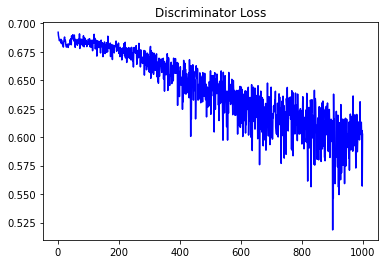

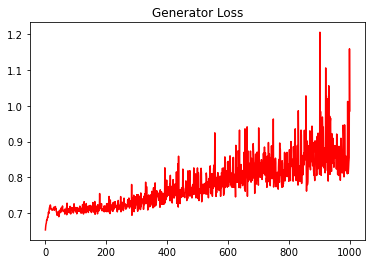

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5333731934027747


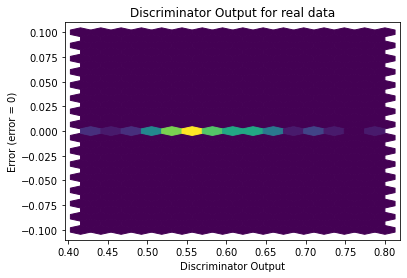

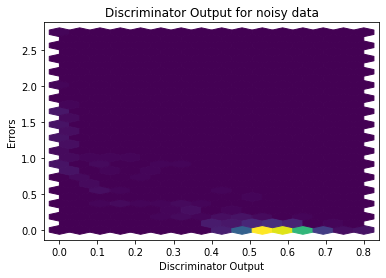

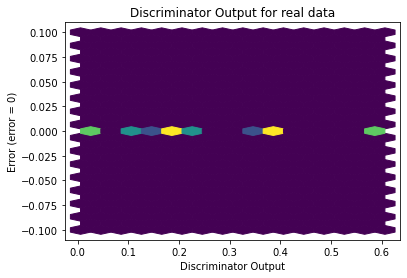

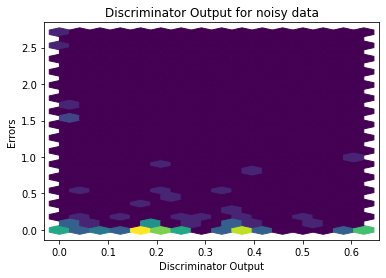

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


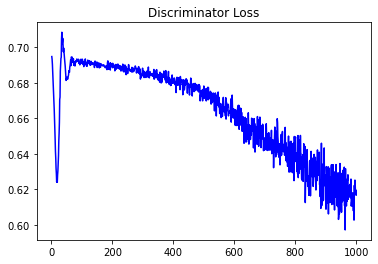

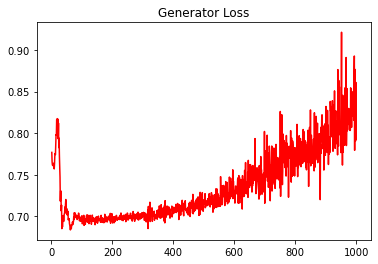

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5203499883003533


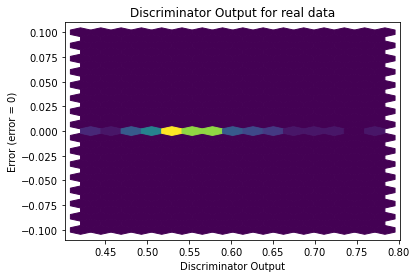

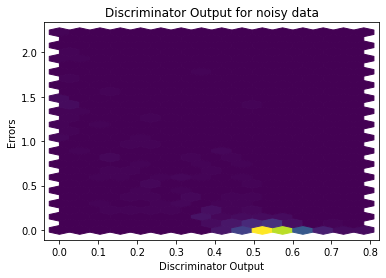

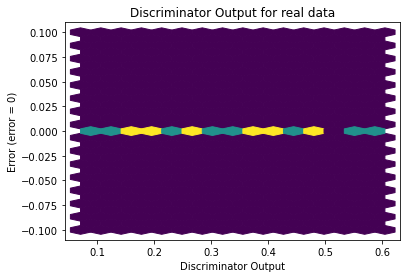

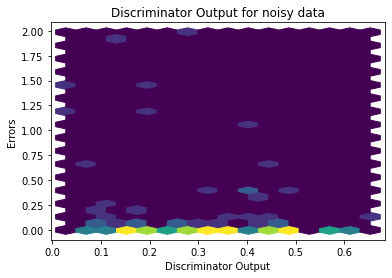

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1764]], requires_grad=True)
